In [11]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.3 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install finance-datareader

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/e6/b3/388ab967a387cc92926f70e97688dd9a7189b29a0773db815ffc5289e2b5/yfinance-0.2.31-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 6.3 MB/s eta 0:00:00a 0:00:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 8.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-cp311-cp311-macosx_11_0_arm64.whl size=243506 sha256=b130be41d9a60ebb60523df5aa2721c03bf68f14d8193a6868708322d7e2fdcf
  Stored in directory: /Users/kwonheejin/Library/Caches/pip/wheels/02/20/23/74a10d0cd31f5d41c19b92ddf4c138ceff01b9f4675f19dbf5
Successfully built peewee


In [1]:
import yfinance as yf
df = yf.download('005930.KS','2021-01-01','2023-10-01')
df.to_excel("삼성전자.xlsx")
df.to_csv("삼성전자.csv")

[*********************100%%**********************]  1 of 1 completed


In [2]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-21,69200.0,69800.0,68800.0,68900.0,68900.0,10796336
2023-09-22,68300.0,68900.0,68300.0,68800.0,68800.0,9897840
2023-09-25,68500.0,69700.0,68500.0,69400.0,69400.0,13582516
2023-09-26,70000.0,70000.0,68400.0,68600.0,68600.0,13143470
2023-09-27,68600.0,69100.0,68200.0,68400.0,68400.0,14886491


In [3]:
df.shape

(677, 6)

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

data = df['Close'].values.reshape(-1, 1)

In [5]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [6]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

In [7]:
sequence_length = 10
sequences = create_sequences(data, sequence_length)
X = sequences[:, :-1]
y = sequences[:, -1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length-1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1331
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0500
Epoch 3/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 4/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 5/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 8/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 9/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 11/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 12/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 13/50
9/9 [==============================] - 0s 2ms/step - loss: 0.

In [11]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"훈련 손실: {train_loss:.5f}")
print(f"테스트 손실: {test_loss:.5f}")

훈련 손실: 0.00112
테스트 손실: 0.00126


In [12]:
predicted = model.predict(X_test)

5/5 [==============================] - 0s 760us/step


In [13]:
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)

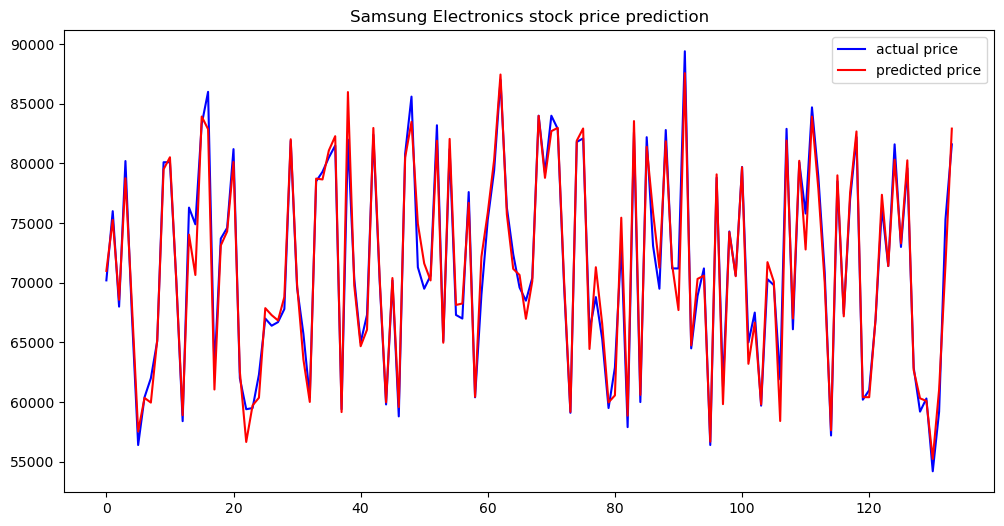

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='actual price', color='blue')
plt.plot(predicted, label='predicted price', color='red')
plt.title('Samsung Electronics stock price prediction')
plt.legend()
plt.show()